In [315]:
import pandas as pd
pd.set_option('max_columns', 50)
players = pd.read_excel('players.xlsx', index = False)
matches = pd.read_excel('matches.xlsx', index = False)

In [316]:
players.info()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43516 entries, 0 to 43515
Data columns (total 32 columns):
id        43516 non-null int64
Team      43516 non-null object
Player    43516 non-null object
K         43516 non-null int64
HB        43516 non-null int64
D         43516 non-null int64
M         43516 non-null int64
G         43516 non-null int64
B         43516 non-null int64
T         43516 non-null int64
HO        43516 non-null int64
I50       43516 non-null int64
FF        43516 non-null int64
FA        43516 non-null int64
AF        43516 non-null int64
SC        43516 non-null int64
CP        43516 non-null int64
UP        43516 non-null int64
ED        43516 non-null int64
DE%       43516 non-null float64
CG        43516 non-null int64
CM        43516 non-null int64
GA        43516 non-null int64
MI5       43516 non-null int64
CL        43516 non-null int64
R50       43516 non-null int64
1%        43516 non-null int64
BO        43516 non-null int64
TOG%      43516 non

In [318]:
# Separate known data from unknown - 2016...
df = matches
players2 = players.copy()

# TURNED OFF FOR NOW UNTIL USING MACHINE LEARNING AGAIN
# players2 = df[['id','Date']].merge(players, left_on = 'id', right_on = 'id')

# df['Date'] = pd.to_datetime(df['Date'])
# matches = df[df['Date'].map(lambda x: x.year) < 2016]
# matches_2016 = df[df['Date'].map(lambda x: x.year) == 2016]

# df = players2
# df['Date'] = pd.to_datetime(df['Date'])
# players2 = df[df['Date'].map(lambda x: x.year) < 2016]
# players_2016 = df[df['Date'].map(lambda x: x.year) == 2016]
# players2.info(), players_2016.info()

In [319]:
import itertools

# Get match ids
match_ids = players2[players2.columns[0]].unique()

# Get column ids for stats
stat_cols = range(4,30)

# Copy player table before manipulating it.
pl = players2.copy()

# Iterate over all matches and all stats
for m, s in itertools.product(match_ids, stat_cols):
    df = pl.loc[pl['id'] == m,[pl.columns[s]]] # Reference slice
    top = max(df[df.columns[0]]) # Find maximum in that slice
    pl.loc[pl['id'] == m,[pl.columns[s]]] = df[df.columns[0]].map(lambda x: 100*x/top) # Update original data (not just slice)

pl

,id,Team,Player,K,HB,D,M,G,B,T,HO,I50,FF,FA,AF,SC,CP,UP,ED,DE%,CG,CM,GA,MI5,CL,R50,1%,BO,TOG%,3,2,1
0,5540,GWS,Toby Greene,22,76,97,15,25,66,33,0,60,66,100,81,52,80,85,55,50.0,100,0,50,0,100,0,10,0,93,NaN,NaN,1.0
1,5540,GWS,Callan Ward,14,76,76,15,25,33,50,6,100,100,0,74,59,76,51,58,66.7,18,0,100,0,87,12,0,0,75,NaN,1.0,NaN
2,5540,GWS,Dom Tyson,13,61,66,38,25,0,33,0,30,0,66,63,49,42,62,55,73.1,54,0,0,33,50,12,0,14,75,NaN,NaN,NaN
3,5540,GWS,Tom Scully,12,61,64,15,0,33,16,0,40,0,66,48,47,42,62,55,76.0,18,0,0,0,25,25,20,0,75,NaN,NaN,NaN
4,5540,GWS,Taylor Adams,10,61,58,7,0,0,66,0,20,100,33,53,42,52,44,44,65.2,9,0,0,0,75,0,10,0,66,NaN,NaN,NaN
5,5540,GWS,Adam Treloar,12,52,58,46,25,0,50,0,50,0,0,67,45,19,66,50,73.9,0,0,50,0,25,12,10,42,72,NaN,NaN,NaN
6,5540,GWS,Luke Power,8,52,48,15,0,0,0,0,10,66,33,36,30,57,29,44,78.9,27,0,0,0,37,0,30,0,76,NaN,NaN,NaN
7,5540,GWS,Rhys Palmer,8,52,48,23,75,33,33,6,20,0,0,60,50,38,40,41,73.7,0,0,0,100,25,12,20,0,100,NaN,NaN,NaN
8,5540,GWS,Adam Kennedy,7,47,43,38,0,0,16,0,10,33,0,43,29,14,48,44,88.2,9,0,0,0,0,25,10,0,72,NaN,NaN,NaN
9,5540,GWS,Curtly Hampton,13,19,43,23,0,0,16,0,0,0,66,38,29,19,40,29,58.8,27,0,0,0,0,50,10,0,70,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125dd7f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128d6f8d0>]], dtype=object)

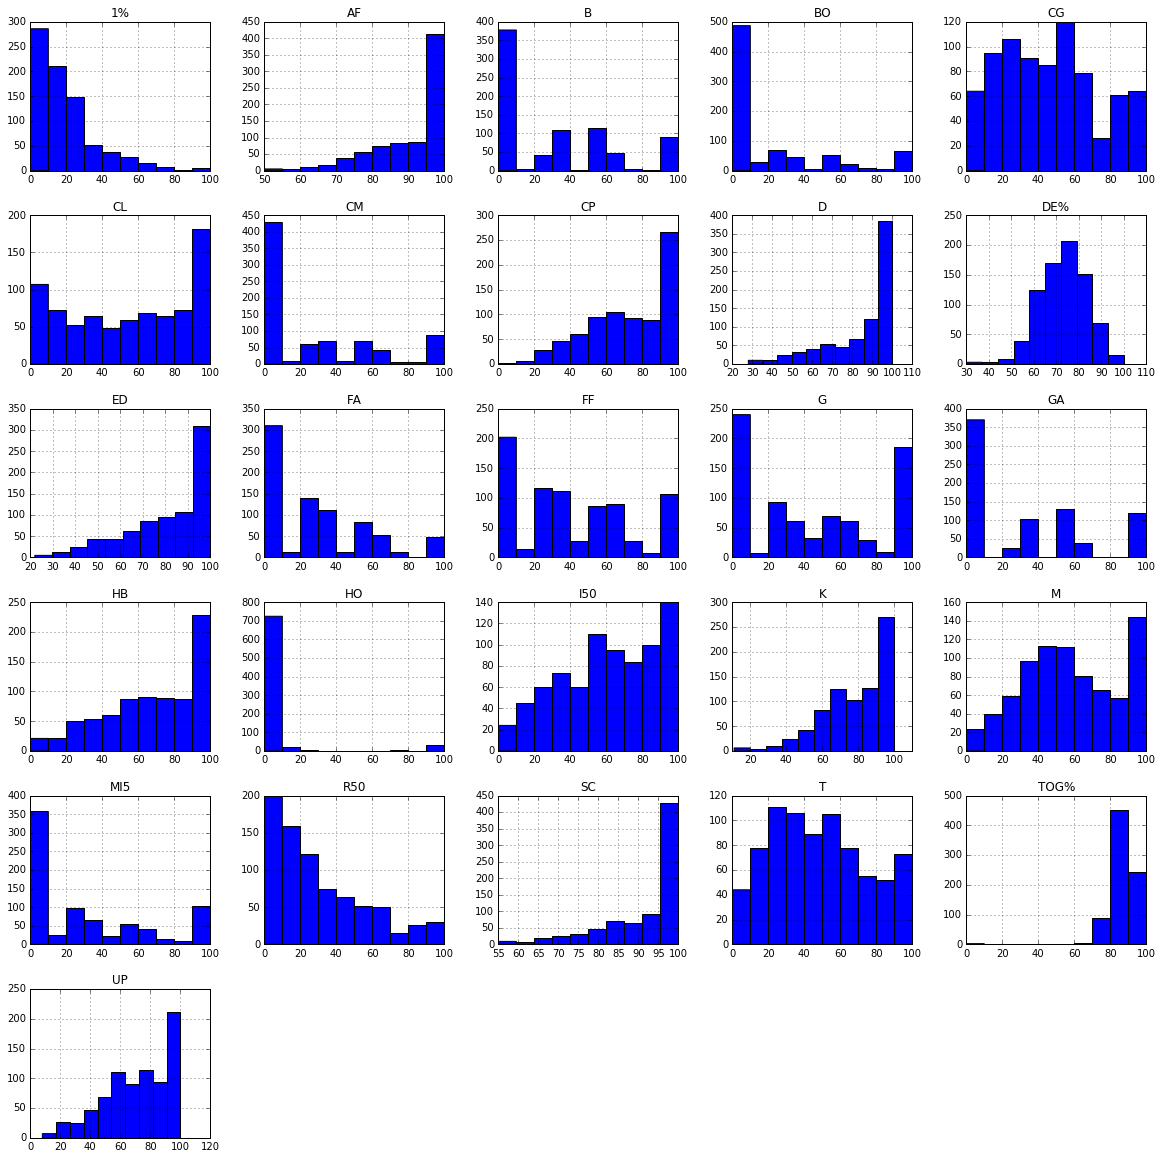

In [63]:
# Visualise 3 vote getters' stats
%matplotlib inline
votes3 = pl[pl[3].notnull()]
votes3[votes3.columns[stat_cols]].hist(figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a74cdd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12bf49c10>]], dtype=object)

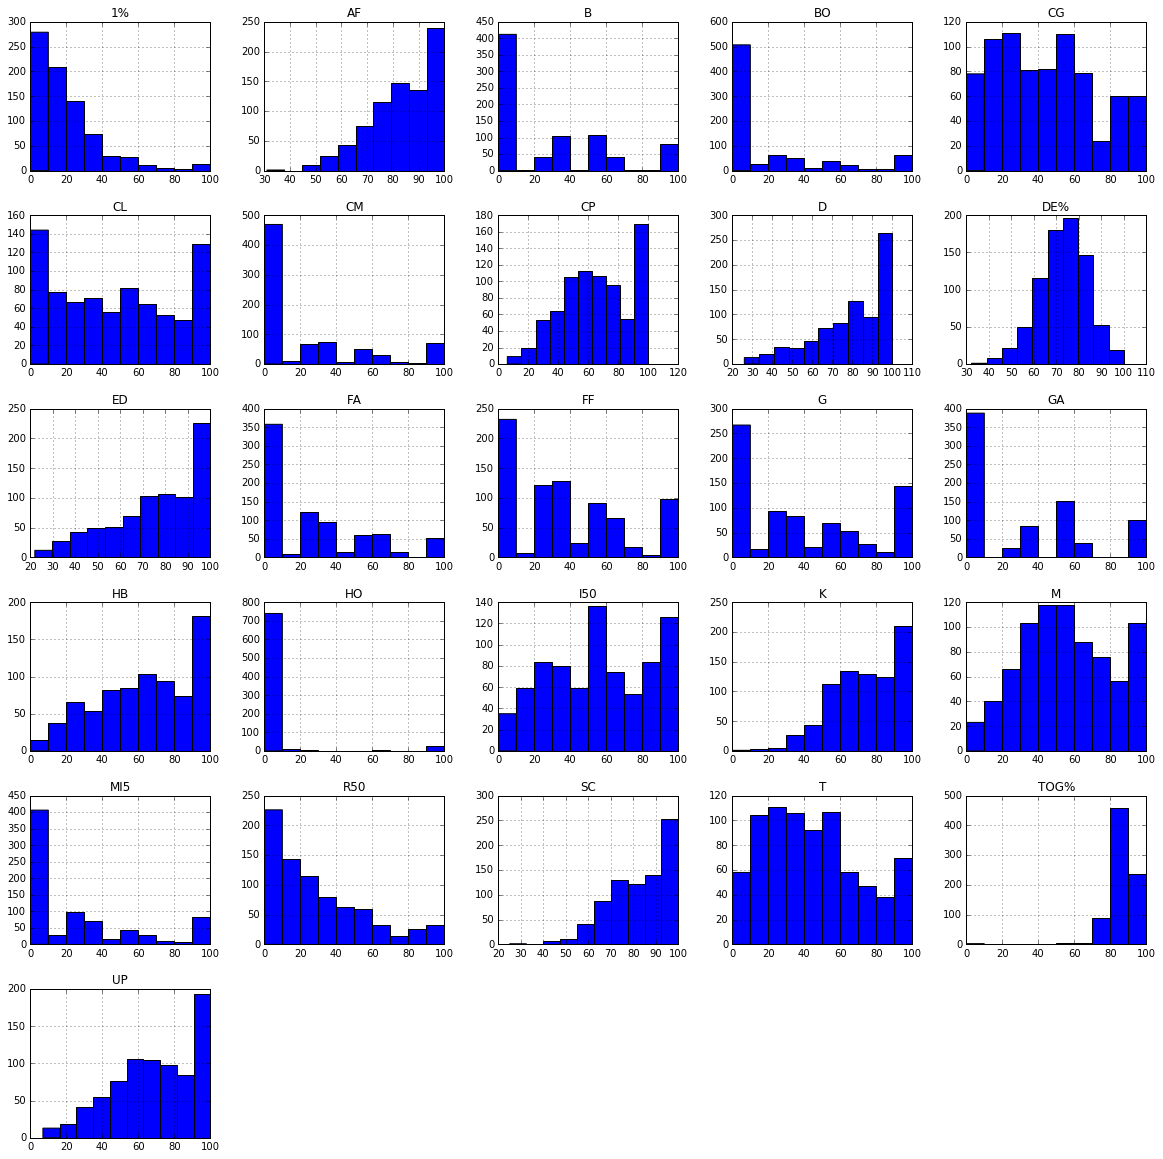

In [64]:
# Visualise 2 vote getters' stats
%matplotlib inline
votes3 = pl[pl[2].notnull()]
votes3[votes3.columns[stat_cols]].hist(figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c8a7a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130019cd0>]], dtype=object)

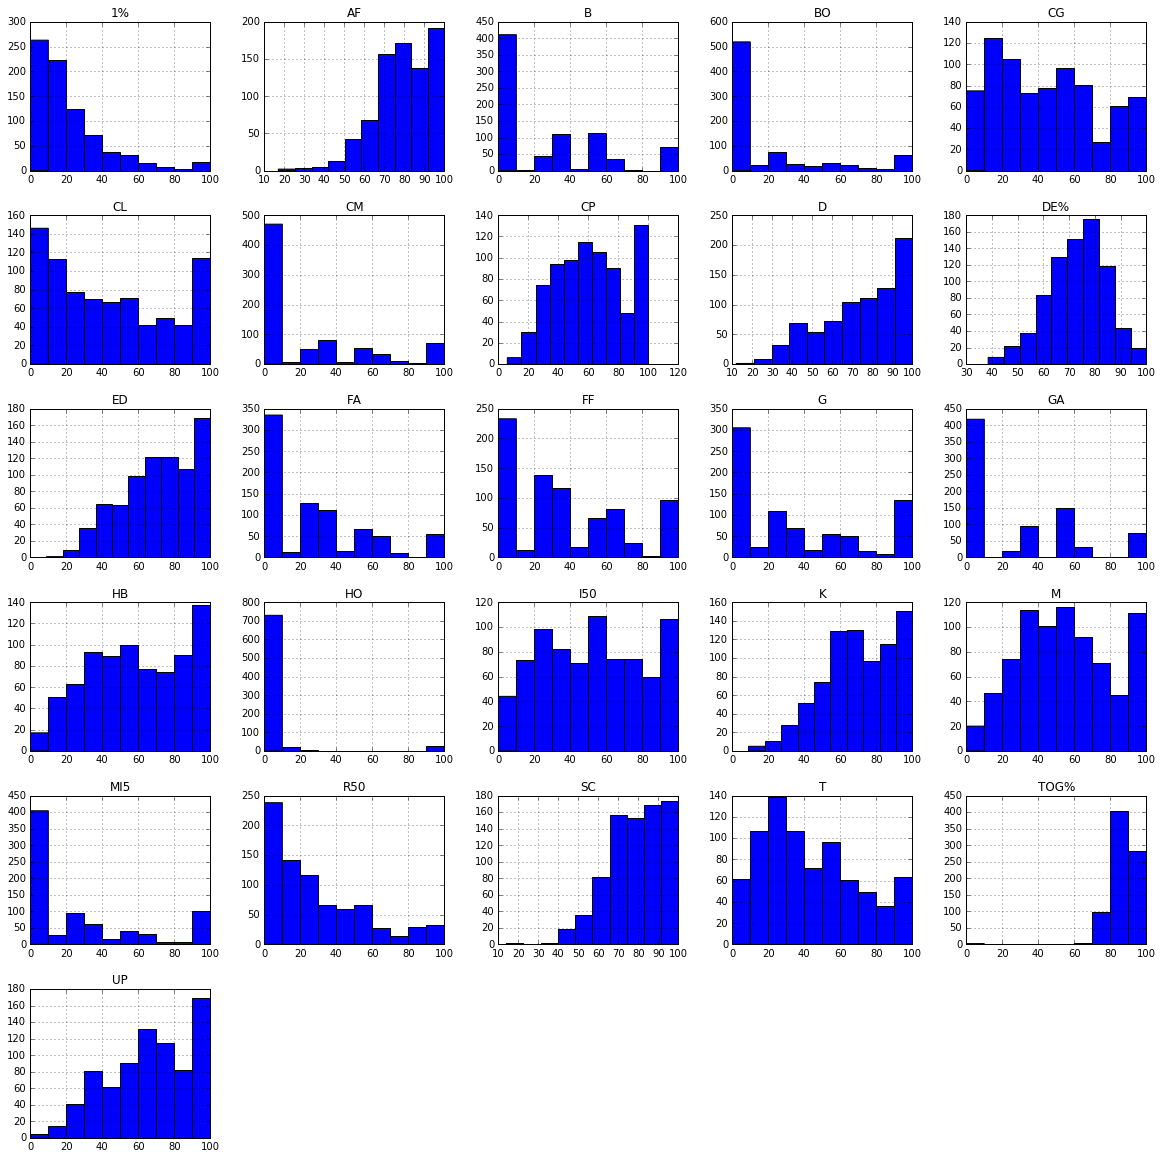

In [65]:
# Visualise 1 vote getters' stats
%matplotlib inline
votes3 = pl[pl[1].notnull()]
votes3[votes3.columns[stat_cols]].hist(figsize = (20,20))

In [320]:
def get_rank_and_buffer(df, stat_name):
    k = list(df[stat_name])
    s = sorted(k, reverse = True) # Sorted normalised scores
    r_and_b = {} # Dictionary to store the ranks & its buffer from nearest competitor

    # Add the first rank ad buffer to dictionary
    rank = 1
    buff = s[0] - s[1]
    r_and_b[s[0]] = (rank, buff)

    # Add the middle ranks and buffers to dictionary
    for i in range(1, len(s)-1):
        if s[i] < s[i-1]:
            rank += 1
            buff = s[i] - s[i+1]
            r_and_b[s[i]] = (rank, buff)

    # Add the last rank and buffer to dictionary
    if s[i] < s[i-1]:
        rank += 1
    r_and_b[s[len(s)-1]] = (rank, 0)
    
    return r_and_b

In [345]:
import itertools

# Get match ids
match_ids = pl[pl.columns[0]].unique()

# Get column ids for stats
stat_cols = ['AF','SC']

# Copy player table before manipulating it.
players3 = players2.copy()
pl = players3
for s in stat_cols:
    pl['%s_rank'%s] = 0.0
    pl['%s_buff'%s] = 0.0
    pl['%s_bin'%s] = 0.0

bin_size = 5
def which_bin(value):
        for i in range(0,bin_size+100, bin_size):
            if value <= i:
                return i

# Iterate over all matches and all stats
for m, s in itertools.product(match_ids, stat_cols):
    df = pl.loc[pl['id'] == m, [s]] # Reference slice (all players, one game, one stat)
    r_and_b = get_rank_and_buffer(df, s)
    
    # Add the rank and buffer columns to dataframe
    pl.loc[pl['id'] == m, ['%s_rank'%s]] = df[s].map(lambda x: r_and_b[x][0])
    pl.loc[pl['id'] == m, ['%s_buff'%s]] = df[s].map(lambda x: r_and_b[x][1])
    
    # Add which bin, the buffer belongs in, ie 0 to denote buff = 0
    # 10 to denote buff = 6 for bin_size = 10 etc...
    df = pl.loc[pl['id'] == m, [s, '%s_buff'%s]]
    pl.loc[pl['id'] == m, ['%s_bin'%s]] = df['%s_buff'%s].map(lambda x: which_bin(x))

players3 = pl
pl

,id,Team,Player,K,HB,D,M,G,B,T,HO,I50,FF,FA,AF,SC,CP,UP,ED,DE%,CG,CM,GA,MI5,CL,R50,1%,BO,TOG%,3,2,1,AF_rank,AF_buff,AF_bin,SC_rank,SC_buff,SC_bin
0,5540,GWS,Toby Greene,22,16,38,2,1,2,2,0,6,2,3,113,100,17,23,19,50.0,11,0,1,0,8,0,1,0,110,NaN,NaN,1.0,4.0,8.0,10.0,8.0,0.0,0.0
1,5540,GWS,Callan Ward,14,16,30,2,1,1,3,2,10,3,0,104,115,16,14,20,66.7,2,0,2,0,7,1,0,0,89,NaN,1.0,NaN,6.0,0.0,0.0,4.0,2.0,5.0
2,5540,GWS,Dom Tyson,13,13,26,5,1,0,2,0,3,0,2,88,95,9,17,19,73.1,6,0,0,1,4,1,0,1,89,NaN,NaN,NaN,10.0,3.0,5.0,11.0,4.0,5.0
3,5540,GWS,Tom Scully,12,13,25,2,0,1,1,0,4,0,2,67,91,9,17,19,76.0,2,0,0,0,2,2,2,0,89,NaN,NaN,NaN,18.0,1.0,5.0,12.0,4.0,5.0
4,5540,GWS,Taylor Adams,10,13,23,1,0,0,4,0,2,3,1,75,82,11,12,15,65.2,1,0,0,0,6,0,1,0,78,NaN,NaN,NaN,15.0,2.0,5.0,15.0,1.0,5.0
5,5540,GWS,Adam Treloar,12,11,23,6,1,0,3,0,5,0,0,94,87,4,18,17,73.9,0,0,1,0,2,1,1,3,86,NaN,NaN,NaN,9.0,6.0,10.0,13.0,4.0,5.0
6,5540,GWS,Luke Power,8,11,19,2,0,0,0,0,1,2,1,51,59,12,8,15,78.9,3,0,0,0,3,0,3,0,90,NaN,NaN,NaN,26.0,0.0,0.0,25.0,2.0,5.0
7,5540,GWS,Rhys Palmer,8,11,19,3,3,1,2,2,2,0,0,84,97,8,11,14,73.7,0,0,0,3,2,1,2,0,118,NaN,NaN,NaN,12.0,0.0,0.0,10.0,2.0,5.0
8,5540,GWS,Adam Kennedy,7,10,17,5,0,0,1,0,1,1,0,61,56,3,13,15,88.2,1,0,0,0,0,2,1,0,86,NaN,NaN,NaN,23.0,0.0,0.0,27.0,1.0,5.0
9,5540,GWS,Curtly Hampton,13,4,17,3,0,0,1,0,0,0,2,54,57,4,11,10,58.8,3,0,0,0,0,4,1,0,83,NaN,NaN,NaN,24.0,0.0,0.0,26.0,1.0,5.0


In [328]:
total = 791.0
ress = []
# Analyse AF and SC values to see which give best results
for a in range(1,15):
    for a_bin in range(0,20, bin_size):
        for s in range(1,15):
            for s_bin in range(0,20, bin_size):
                occurrences = float(len(pl[(pl['AF_rank']==a)&(pl['SC_rank']==s)]))
                res = [a,a_bin,s,s_bin,occurrences]
                for v in range(3,0, -1):
                    df = pl[pl[v].notnull()]
                    num = len(df[(df['AF_rank']==a)&(df['SC_rank']==s)])
                    res.append(num)
                    res.append(float(num/total))
                    if occurrences:
                        res.append(float(num/occurrences))
                    else:
                        res.append(float(0.0))
                ress.append(res)
        
df = pd.DataFrame(ress, columns = ['AF_rank','AF_bin', 'SC_rank','SC_bin', 'total_occur','3_occur','3_%','prob_3',
                                  '2_occur', '2_%', 'prob_2', '1_occur', '1_%', 'prob_1'])
df = df.round(2)
df['max_vote_prob'] = 0

for i, r in df.iterrows():
    a = {3:r['prob_3'], 2:r['prob_2'], 1:r['prob_1']}
    if sum(a):
        df.set_value(i,'max_vote_prob', max(a, key=a.get))

predictors = df.sort_values(by = ['prob_3', 'prob_2', 'prob_1'], ascending = [False,False,False])
predictors

,AF_rank,AF_bin,SC_rank,SC_bin,total_occur,3_occur,3_%,prob_3,2_occur,2_%,prob_2,1_occur,1_%,prob_1,max_vote_prob
0,1,0,1,0,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
1,1,0,1,5,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
2,1,0,1,10,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
3,1,0,1,15,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
56,1,5,1,0,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
57,1,5,1,5,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
58,1,5,1,10,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
59,1,5,1,15,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
112,1,10,1,0,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
113,1,10,1,5,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3


In [480]:
# Predict future brownlow votes - 2016
players3 = pl.copy()
p = predictors
ids_2016 = range(6172, 6370)
# for i in ids_2016:
#     # Find 3 vote getter

#df = df.loc[(df['id'] == 6178)].sort_values(by = ['SC_rank','AF_rank'])#.iloc[0]#[3] = 3.0

# Loop over all matches in 2016
for m in ids_2016:
    df = players3.loc[(players3['id'] == m)].sort_values(by = ['SC_rank','AF_rank'])
    
    # Find 3 vote getter
    for i, r in df.iterrows():
        most_likely_vote = p.loc[(p['SC_rank'] == r['SC_rank'])&
                                 (p['AF_rank'] == r['AF_rank']), 'max_vote_prob']
        if len(most_likely_vote) == 0:
            most_likely_vote = 0
        else:
            most_likely_vote = most_likely_vote.iloc[0]

        if most_likely_vote == 3:
            players3.loc[i, 3] = 1.0
            print '%s match %s 3 votes %s SC %s AF %s'%(i, m, r['Player'], r['SC_rank'], r['AF_rank'])
            break
            
    if most_likely_vote == 0: # Second loop for finding 3 votes, if first fails
        for i, r in df.iterrows():
            most_likely_vote = p.loc[(p['SC_rank'] == r['SC_rank'])&
                                     (p['AF_rank'] == r['AF_rank']), 'max_vote_prob']
            if len(most_likely_vote) == 0:
                most_likely_vote = 0
            else:
                most_likely_vote = most_likely_vote.iloc[0]

            if most_likely_vote >= 2:
                players3.loc[i, 3] = 1.0
                print '%s match %s 3 votes %s SC %s AF %s'%(i, m, r['Player'], r['SC_rank'], r['AF_rank'])
                break
            
    # Find 2 vote getter
    for i, r in df.iterrows():
        if players3.loc[i, 3] == 1: # If this row has 3 votes already
            continue

        most_likely_vote = p.loc[(p['SC_rank'] == r['SC_rank'])&
                                 (p['AF_rank'] == r['AF_rank']), 'max_vote_prob']
        if len(most_likely_vote) == 0:
            most_likely_vote = 0
        else:
            most_likely_vote = most_likely_vote.iloc[0]
            
        if most_likely_vote >= 2:
            players3.loc[i, 2] = 1.0
            print '%s match %s 2 votes %s SC %s AF %s'%(i, m, r['Player'], r['SC_rank'], r['AF_rank'])
            break
            
    # Find 1 vote getter
    for i, r in df.iterrows():
        if (players3.loc[i, 2] == 1) | (players3.loc[i, 3] == 1): # If this row has 2 or 3 votes already
            continue

        most_likely_vote = p.loc[(p['SC_rank'] == r['SC_rank'])&
                                 (p['AF_rank'] == r['AF_rank']), 'max_vote_prob']
        if len(most_likely_vote) == 0:
            most_likely_vote = 0
        else:
            most_likely_vote = most_likely_vote.iloc[0]
            
        if most_likely_vote >= 1:
            players3.loc[i, 1] = 1.0
            print '%s match %s 1 votes %s SC %s AF %s'%(i, m, r['Player'], r['SC_rank'], r['AF_rank'])
            break
            
players3

43472 match 6172 3 votes Kane Lambert SC 1.0 AF 3.0
43497 match 6172 2 votes Marc Murphy SC 2.0 AF 2.0
43496 match 6172 1 votes Sam Docherty SC 3.0 AF 5.0
43452 match 6173 3 votes Callan Ward SC 1.0 AF 2.0
43433 match 6173 2 votes Ben Kennedy SC 2.0 AF 13.0
43430 match 6173 1 votes Tom McDonald SC 3.0 AF 8.0
43385 match 6174 3 votes Gary Jnr Ablett SC 1.0 AF 1.0
43406 match 6174 2 votes David Zaharakis SC 2.0 AF 2.0
43384 match 6174 1 votes Aaron Hall SC 3.0 AF 2.0
43355 match 6175 3 votes Todd Goldstein SC 1.0 AF 1.0
43345 match 6175 2 votes Jarrad Waite SC 2.0 AF 2.0
43340 match 6175 1 votes Ben Cunnington SC 3.0 AF 6.0
43296 match 6176 3 votes Luke Parker SC 1.0 AF 1.0
43297 match 6176 2 votes Kieren Jack SC 2.0 AF 5.0
43298 match 6176 1 votes Jake Lloyd SC 2.0 AF 6.0
43252 match 6177 3 votes Jason Johannisen SC 1.0 AF 1.0
43253 match 6177 2 votes Shane Biggs SC 2.0 AF 2.0
43254 match 6177 1 votes Robert Murphy SC 4.0 AF 4.0
43241 match 6178 3 votes Tom Hickey SC 1.0 AF 4.0
43210 ma

,id,Team,Player,K,HB,D,M,G,B,T,HO,I50,FF,FA,AF,SC,CP,UP,ED,DE%,CG,CM,GA,MI5,CL,R50,1%,BO,TOG%,3,2,1,AF_rank,AF_buff,AF_bin,SC_rank,SC_buff,SC_bin
0,5540,GWS,Toby Greene,22,16,38,2,1,2,2,0,6,2,3,113,100,17,23,19,50.0,11,0,1,0,8,0,1,0,110,NaN,NaN,1.0,4.0,8.0,10.0,8.0,0.0,0.0
1,5540,GWS,Callan Ward,14,16,30,2,1,1,3,2,10,3,0,104,115,16,14,20,66.7,2,0,2,0,7,1,0,0,89,NaN,1.0,NaN,6.0,0.0,0.0,4.0,2.0,5.0
2,5540,GWS,Dom Tyson,13,13,26,5,1,0,2,0,3,0,2,88,95,9,17,19,73.1,6,0,0,1,4,1,0,1,89,NaN,NaN,NaN,10.0,3.0,5.0,11.0,4.0,5.0
3,5540,GWS,Tom Scully,12,13,25,2,0,1,1,0,4,0,2,67,91,9,17,19,76.0,2,0,0,0,2,2,2,0,89,NaN,NaN,NaN,18.0,1.0,5.0,12.0,4.0,5.0
4,5540,GWS,Taylor Adams,10,13,23,1,0,0,4,0,2,3,1,75,82,11,12,15,65.2,1,0,0,0,6,0,1,0,78,NaN,NaN,NaN,15.0,2.0,5.0,15.0,1.0,5.0
5,5540,GWS,Adam Treloar,12,11,23,6,1,0,3,0,5,0,0,94,87,4,18,17,73.9,0,0,1,0,2,1,1,3,86,NaN,NaN,NaN,9.0,6.0,10.0,13.0,4.0,5.0
6,5540,GWS,Luke Power,8,11,19,2,0,0,0,0,1,2,1,51,59,12,8,15,78.9,3,0,0,0,3,0,3,0,90,NaN,NaN,NaN,26.0,0.0,0.0,25.0,2.0,5.0
7,5540,GWS,Rhys Palmer,8,11,19,3,3,1,2,2,2,0,0,84,97,8,11,14,73.7,0,0,0,3,2,1,2,0,118,NaN,NaN,NaN,12.0,0.0,0.0,10.0,2.0,5.0
8,5540,GWS,Adam Kennedy,7,10,17,5,0,0,1,0,1,1,0,61,56,3,13,15,88.2,1,0,0,0,0,2,1,0,86,NaN,NaN,NaN,23.0,0.0,0.0,27.0,1.0,5.0
9,5540,GWS,Curtly Hampton,13,4,17,3,0,0,1,0,0,0,2,54,57,4,11,10,58.8,3,0,0,0,0,4,1,0,83,NaN,NaN,NaN,24.0,0.0,0.0,26.0,1.0,5.0


In [503]:
df = players3.copy()
df = df[df['id'].map(lambda x: x in ids_2016)]
cols = ['id','Team', 'Player', 3, 2, 1]
brownlow_2016_predictions = df[df[3].notnull()|df[2].notnull()|df[1].notnull()]
brownlow_2016_predictions.to_excel('brownlow_2016_predictions.xlsx')
df = df[cols].fillna(0).groupby(['Team', 'Player']).sum()
# cols = ['id', 3, 2, 1]
# df = df[cols].fillna(0).groupby(['id']).sum()
df['votes'] = df[3]*3 + df[2]*2 + df[1]
df = df.sort_values(by = 'votes', ascending = False).astype(int)#.describe()
brownlow_2016_predictions_leaderboard = df
df.to_excel('brownlow_2016_predictions_leaderboard.xlsx')

In [524]:
df = brownlow_2016_predictions
df = df[['id','Player','Team',3,2,1]]
# df = brownlow_2016_predictions
# df.reset_index()
df = matches_2016.merge(df, left_on = 'id', right_on = 'id')
df = df[['Round','Team1','Team2','Player','Team', 3, 2, 1]]
df[3] = (df['Player'] + ' - ' + df['Team'])*df[3].notnull()
df[2] = (df['Player'] + ' - ' + df['Team'])*df[2].notnull()
df[1] = (df['Player'] + ' - ' + df['Team'])*df[1].notnull()
df.drop(['Player','Team'], axis = 1, inplace = True)
df = df.sort_values(by = ['Round','Team1','Team2', 3, 2, 1], ascending = [True, True, True, False, False, False])
brownlow_2016_predictions_by_round = df
df.to_excel('brownlow_2016_predictions_by_round.xlsx', index = False)
df

,Round,Team1,Team2,3,2,1
567,1,Geelong,Hawthorn,Patrick Dangerfield - Geelong,,
568,1,Geelong,Hawthorn,,Sam Mitchell - Hawthorn,
569,1,Geelong,Hawthorn,,,Jack Gunston - Hawthorn
586,1,Gold Coast,Essendon,Gary Jnr Ablett - Gold Coast,,
587,1,Gold Coast,Essendon,,David Zaharakis - Essendon,
585,1,Gold Coast,Essendon,,,Aaron Hall - Gold Coast
590,1,Melbourne,GWS,Callan Ward - GWS,,
589,1,Melbourne,GWS,,Ben Kennedy - Melbourne,
588,1,Melbourne,GWS,,,Tom McDonald - Melbourne
584,1,North Melbourne,Adelaide,Todd Goldstein - North Melbourne,,


In [384]:
df = predictors
df = df[df['total_occur']>30]
predictors[(predictors['AF_rank'] == 5) & (predictors['SC_rank'] == 3)]

,AF_rank,SC_rank,total_occur,3_occur,3_%,prob_3,2_occur,2_%,prob_2,1_occur,1_%,prob_1,max_vote_prob
58,5,3,116.0,5,0.01,0.04,5,0.01,0.04,14,0.02,0.12,1


In [126]:
df = pl.loc[pl['id'] == 5964,['K']]
k = list(df['K'])
s = sorted(k, reverse = True) # Sorted normalised scores
r_and_b = {} # Store the ranks & its buffer from nearest competitor

# Add the first rank ad buffer
rank = 1
buff = s[0] - s[1]
r_and_b[s[0]] = (rank, buff)

# Add the middle ranks and buffers
for i in range(1, len(s)-1):
    if s[i] < s[i-1]:
        rank += 1
        buff = s[i] - s[i+1]
        r_and_b[s[i]] = (rank, buff)
    
# Add the last rank and buffer
if s[i] < s[i-1]:
    rank += 1
r_and_b[s[len(s)-1]] = (rank, 0)
df['K_rank'] = df['K'].map(lambda x: r_and_b[x][0])
df['K_buff'] = df['K'].map(lambda x: r_and_b[x][1])
bin_size = 10
def which_bin(value):
    for i in range(0,bin_size+100, bin_size):
        if value <= i:
            return i
df['K_bin'] = df['K_buff'].map(lambda x: which_bin(x))
df

,K,K_rank,K_buff,K_bin
34760,88,3,0,0
34761,64,7,6,10
34762,88,3,0,0
34763,94,2,6,10
34764,76,5,0,0
34765,52,9,0,0
34766,35,12,0,0
34767,52,9,0,0
34768,82,4,0,0
34769,82,4,0,0


In [76]:
# Predict using merely AFL Fantasy, and Super Coach scores 
pl[pl[3].notnull()][['AF','SC']]['AF'].value_counts()[100],
pl[pl[2].notnull()][['AF','SC']]['AF'].value_counts()[100],
pl[pl[1].notnull()][['AF','SC']]['AF'].value_counts()[100]

104

In [68]:
pl[pl[2].notnull()][['AF','SC']].describe()

,AF,SC
count,791.000000,791.000000
mean,84.150442,83.075853
std,13.176845,13.888045
min,31.000000,25.000000
25%,75.000000,73.000000
50%,85.000000,84.000000
75%,96.000000,96.000000
max,100.000000,100.000000


In [69]:
pl[pl[1].notnull()][['AF','SC']].describe()

,AF,SC
count,791.000000,791.000000
mean,79.781290,78.890013
std,14.580165,14.401803
min,17.000000,14.000000
25%,71.000000,69.000000
50%,80.000000,80.000000
75%,91.000000,90.000000
max,100.000000,100.000000


In [74]:
# Do machine learning with linear regression using only AF and SC
import sklearn
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
                pl[['AF','SC']], pl[[3,2,1]].fillna(0))
lm = LinearRegression()
lm.fit(X_train, Y_train)
test_score = lm.score(X_test, Y_test)
train_score = lm.score(X_train, Y_train)
test_score, train_score

(0.064252054540642881, 0.060455733149367995)

In [173]:
# Apply and Random Forrest Classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
pl = players3
X = pl[['AF', 'SC']].fillna(0)
Y = pl[[3,2,1]].fillna(0)
clf = RandomForestClassifier()
clf = clf.fit(X, Y)
scores = cross_val_score(clf, X, Y)
scores.mean()
#X.shape[0], X.shape[1], Y.shape[0], Y.shape[1]

0.93181818418217954

In [179]:
# Apply this highly unrefined classifier to 2016 player stats
# Just to see what the output looks like
df = players_2016
df = df[df['id']==6176]
X = df[['AF', 'SC']].fillna(0)
Y = clf.predict(X)
df = pd.DataFrame(Y)
df[df[2] != 0 ]

,0,1,2


In [ ]:
# Tune the classifier using grid_search (from logistic regression exercise)

In [351]:
total = 791.0
ress = []
# Analyse AF and SC values to see which give best results
for a in range(1,15):
    for s in range(1,15):
        occurrences = float(len(pl[(pl['AF_rank']==a)&(pl['SC_rank']==s)]))
        res = [a,s,occurrences]
        for v in range(3,0, -1):
            df = pl[pl[v].notnull()]
            num = len(df[(df['AF_rank']==a)&(df['SC_rank']==s)])
            res.append(num)
            res.append(float(num/total))
            if occurrences:
                res.append(float(num/occurrences))
            else:
                res.append(float(0.0))
        ress.append(res)
        
df = pd.DataFrame(ress, columns = ['AF_rank', 'SC_rank', 'total_occur','3_occur','3_%','prob_3',
                                  '2_occur', '2_%', 'prob_2', '1_occur', '1_%', 'prob_1'])
df = df.round(2)
df['max_vote_prob'] = 0

for i, r in df.iterrows():
    a = {3:r['prob_3'], 2:r['prob_2'], 1:r['prob_1']}
    if sum(a):
        df.set_value(i,'max_vote_prob', max(a, key=a.get))

predictors = df.sort_values(by = ['prob_3', 'prob_2', 'prob_1'], ascending = [False,False,False])
predictors

,AF_rank,SC_rank,total_occur,3_occur,3_%,prob_3,2_occur,2_%,prob_2,1_occur,1_%,prob_1,max_vote_prob
0,1,1,489.0,223,0.28,0.46,79,0.10,0.16,45,0.06,0.09,3
14,2,1,221.0,67,0.08,0.30,41,0.05,0.19,18,0.02,0.08,3
112,9,1,10.0,3,0.00,0.30,1,0.00,0.10,0,0.00,0.00,3
1,1,2,212.0,59,0.07,0.28,46,0.06,0.22,22,0.03,0.10,3
42,4,1,79.0,21,0.03,0.27,13,0.02,0.16,3,0.00,0.04,3
140,11,1,4.0,1,0.00,0.25,0,0.00,0.00,0,0.00,0.00,3
84,7,1,17.0,4,0.01,0.24,2,0.00,0.12,1,0.00,0.06,3
28,3,1,97.0,22,0.03,0.23,11,0.01,0.11,6,0.01,0.06,3
2,1,3,117.0,26,0.03,0.22,16,0.02,0.14,15,0.02,0.13,3
56,5,1,43.0,9,0.01,0.21,2,0.00,0.05,2,0.00,0.05,3
